In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
import sys

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

import matplotlib.pyplot as plt


In [ ]:
a = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
a

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(len(X_train))
print(X_train.shape)
print(len(y_train))
print(y_train.shape)
print(y_train[:5])

60000
(60000, 28, 28)
60000
(60000,)
[9 0 0 3 0]


In [ ]:
print(len(X_test))
print(X_test.shape)
print(len(y_test))
print(y_test.shape)
print(y_test[:5])

10000
(10000, 28, 28)
10000
(10000,)
[9 2 1 1 6]


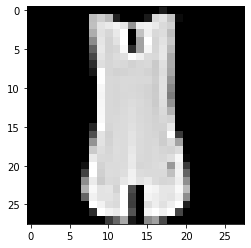

In [ ]:
digit = X_train[4]
plt.imshow(digit, cmap='gray')
plt.show()

In [ ]:
np.set_printoptions(linewidth=150)
print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 189 206 187  32   0   0   0  26 217 226 196  11   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 192 227 234 243 230 147 239 242 234 218 209   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 173 225 215 233 254   0 194 240 217 221 190   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 139 229 212 226 255   0 162 255 213 226 200   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  98 232 211 215 249  46 162 246 214 230 186   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  70 228 213 220 224 252 239 219 217 231 171   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  45 222 214 218 216 210 215 217 202 224 172   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  24 254 214 210 211 214 215 212 203 221 167   

In [ ]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.10196078 0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.74117647 0.80784314 0.73333333
 0.1254902  0.         0.         0.         0.10196078 0.85098039 0.88627451 0.76862745 0.04313725 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.75294118
 0.89019608 0.91764706 0.95294118 0.90196078 0.57647059 0.9372549  0.94901961 0.91764706 0.85490196 0.81960784 0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.67843137 0.8823529

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
mnist.add(layers.Dense(256, activation='relu'))
mnist.add(layers.Dense(10, activation='softmax'))

In [ ]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
%time
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs
Epoch 1/100
375/375 [==============================] - 7s 16ms/step - loss: 0.5778 - accuracy: 0.7890 - val_loss: 0.4641 - val_accuracy: 0.8191
Epoch 2/100
375/375 [==============================] - 6s 16ms/step - loss: 0.3923 - accuracy: 0.8559 - val_loss: 0.3553 - val_accuracy: 0.8691
Epoch 3/100
375/375 [==============================] - 6s 16ms/step - loss: 0.3436 - accuracy: 0.8728 - val_loss: 0.3676 - val_accuracy: 0.8682
Epoch 4/100
375/375 [==============================] - 6s 16ms/step - loss: 0.3167 - accuracy: 0.8824 - val_loss: 0.3435 - val_accuracy: 0.8753
Epoch 5/100
375/375 [==============================] - 6s 16ms/step - loss: 0.2958 - accuracy: 0.8894 - val_loss: 0.3495 - val_accuracy: 0.8811
Epoch 6/100
375/375 [==============================] - 6s 15ms/step - loss: 0.2802 - accuracy: 0.8975 - val_loss: 0.3684 - val_accuracy: 0.8748
Epoch 7/100
375/375 [==============================] - 6s 16ms/step - lo

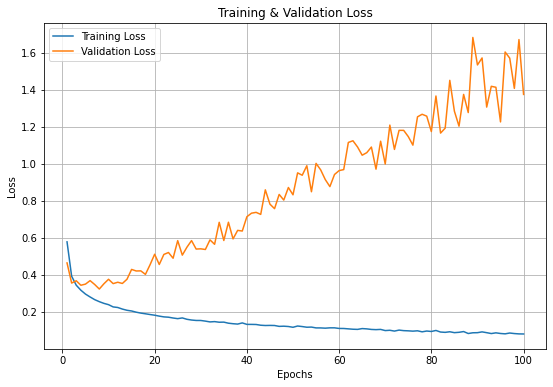

In [ ]:
epochs = range(1, len(Hist_mnist.history['loss']) + 1) # 횟수

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss']) # legend : 범례
plt.grid()
plt.show()

In [ ]:
# Loss & Accuracy
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 1.6274 - accuracy: 0.8907
Loss = 1.62745
Accuracy = 0.89070


In [ ]:
np.set_printoptions(suppress = True, precision=9) # 과학적 표기법X, 0자리까지 표시
np.set_printoptions(threshold=sys.maxsize) # ndarray 전부 표시
print(mnist.predict(X_test[:, :]))

[[0.          0.          0.          0.          0.          0.          0.          0.          0.          1.         ]
 [0.          0.          1.          0.          0.          0.          0.          0.          0.          0.         ]
 [0.          1.          0.          0.          0.          0.          0.          0.          0.          0.         ]
 [0.          1.          0.          0.          0.          0.          0.          0.          0.          0.         ]
 [0.000469494 0.          0.          0.          0.          0.          0.99953055  0.          0.          0.         ]
 [0.          1.          0.          0.          0.          0.          0.          0.          0.          0.         ]
 [0.          0.          0.          0.          1.          0.          0.          0.          0.          0.         ]
 [0.          0.          0.          0.          0.          0.          1.          0.          0.          0.         ]
 [0.          0.